<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn' #на шаге 23 возникает ложное предупреждение. прогуглил и нашел выход, которое убирает это ложное предпреждение.
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
#data['ceiling_height'] = data['ceiling_height'].fillna(111111)
#ch_data = data.query('ceiling_height == 111111')
#ch_data.describe()

### Вывод

1. floors_total - должен быть int, потому что этажи целое число
2. balcony - NaN заменить на нулевые значения, заменить на int 
3. parks_around3000 - должен быть int, количество парков целое число
4. ponds_around3000 - также заменить на int
5. ceiling_height - максимум 100 метров, звучит неправдопободно
6. room - количество комнат 0 звучит довольно странно, нужно перепроверить, к тому же нужно заменить на целое число
7. days_exposition - заменить на int
8. is_apartment - должно быть bool
9. во всех остальных случаях заменим нулевые значения по необходимости
7. first_day_exposition - перевести в datetime формат

Предположения о том, почему пропущены данные:
1. balcony - люди у которых нет балконов, просто не заполняют эту графу
2. ceiling_height - исследовал это поле. никаких странностей не обнаружил. заполню этот столбец медианными значениями.
3. days_exposition - нет никаких предположений на данном этапе. нужно исследовать столбец
4. cityCenters_nearest

## Предобработка данных

In [5]:
data['balcony'].value_counts()
data['balcony'].describe #присутствуют значения NaN, видимо балконов нет
data['balcony'] = data['balcony'].fillna(0).astype('int') #заполняем пустые ячейки нулем, меняем тип данных на целые числа

data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int') #присутствуют значения NaN, видимо парков нет
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int') #присутствуют значения NaN, видимо озёр нет

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заменим пустые значения на медиану

data['is_apartment'] = data['is_apartment'].fillna(False) #пустоты заменим на False

data['last_price'] = data['last_price'].astype('int') #для удобства поменяем на целые числа

data[data['floors_total'].isna()] #к сожалению никаких общих характеристик между total_floor == NaN нет, поэтому оставим как есть

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') #заменили тип данных, без указания времени, так как времени тут нет
data[data['floors_total'].isna()] #никаких общих черт у данных нет, оставляем как есть

data['days_exposition'] = data['days_exposition'].fillna(999999).astype('int')
data = data.query('days_exposition != 999999')
#приходится удалить данные, потому что немогу в моменте создания good_data исключить float days_exposition.
#подсказали использовать Int64, но пишет "ValueError: Cannot convert non-finite values (NA or inf) to integer"
#был такой вариант data[‘days exposition’]=data[‘days exposition’].round().astype(‘Int64’) но выдает аналогично верхней строке ошибку
#просто data['days_exposition'] = data['days_exposition'].astype('int') тоже выдает ошибку. 
#если у вас есть варианты, как без удаления форматировать данные в int, подскажите пожалуйста


In [6]:
#data['year'] = data['first_day_exposition'].dt.year
#data['days_exposition'] = data['days_exposition'].fillna(999999999)
#none_data = data.query('days_exposition == 999999999')
#none_data['year'].value_counts()

#2019    1796
#2018     959
#2017     271
#2015      70
#2016      67
#2014      18`

#Проверил, сколько пропусков в записях за каждый год, скорее всего это всё ещё активные объявления, которые были выгружены в 2019 году (больше всего объявок именно в этот год с пропущенными значениями)
#Данные придется удалить....

## Расчёты и добавление результатов в таблицу

1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [7]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).astype('int')

In [8]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [9]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)

In [10]:
data['living_to_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Text(0.5, 0, 'Высота потолков')

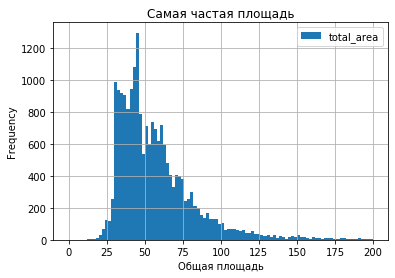

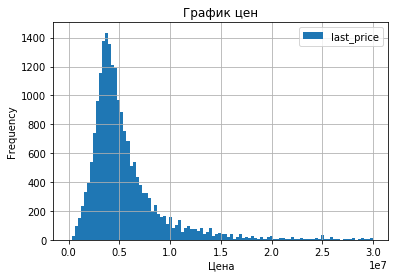

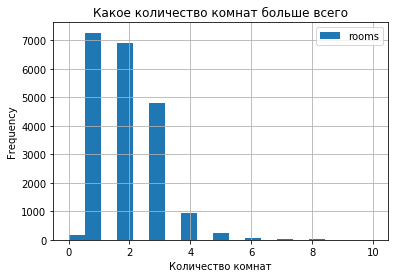

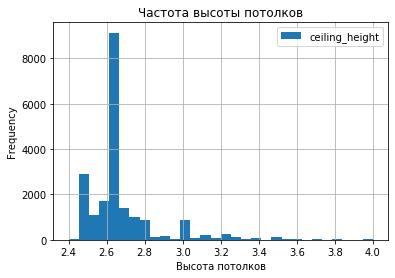

In [11]:
data.plot(kind='hist', y='total_area', bins=100, grid=True, range = (0, 200), title='Самая частая площадь')
plt.xlabel('Общая площадь')
data.plot(kind='hist', y='last_price', bins=100, grid=True, range = (0, 30000000), title='График цен')
plt.xlabel('Цена')
data.plot(kind='hist', y='rooms', bins=19, grid=True, range = (0, 10), title='Какое количество комнат больше всего')
plt.xlabel('Количество комнат')
data.plot(kind='hist', y='ceiling_height', bins=30, grid=True, range = (2.4, 4), title='Частота высоты потолков')
plt.xlabel('Высота потолков')

count    20518.000000
mean        58.870830
std         34.077046
min         12.000000
25%         39.500000
50%         50.900000
75%         67.900000
max        900.000000
Name: total_area, dtype: float64

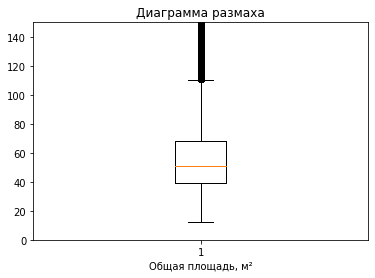

In [12]:
plt.boxplot(data['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, м²')
plt.ylim(0, 150)
data['total_area'].describe()

count    2.051800e+04
mean     6.266173e+06
std      1.086298e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

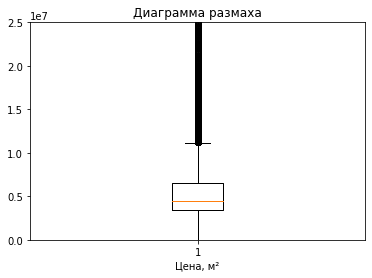

In [13]:
plt.boxplot(data['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цена, м²')
plt.ylim(0, 25000000)
data['last_price'].describe()

count    20518.000000
mean         2.024564
std          1.054808
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

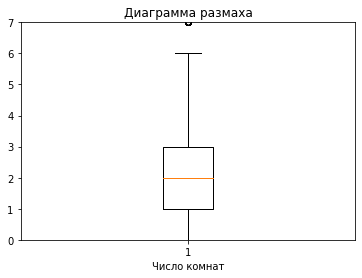

In [14]:
plt.boxplot(data['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат')
plt.ylim(0, 7)
data['rooms'].describe()

(0, 12000000)

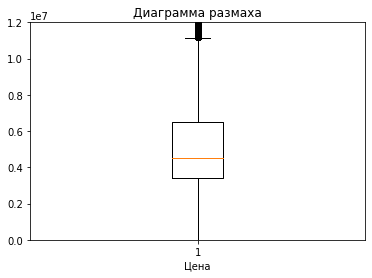

In [15]:
plt.boxplot(data['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цена')
data['last_price'].describe()
plt.ylim(0, 12000000)

In [16]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_to_total_ratio,kitchen_to_total_ratio
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,3,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,NaN,55,95065,0,9,2018,другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,1,806.0,519,129903,3,10,2016,другой,0.552812,0.145405
23692,2,1350000,30.00,2017-07-07,1,2.65,5.0,17.5,4,False,...,0,NaN,413,45000,4,7,2017,другой,0.583333,0.200000
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1,675.0,239,73717,4,8,2016,другой,0.641026,0.128205
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,0,NaN,45,52542,0,1,2018,другой,0.644068,0.144068


Вывод:
1. Площадь колеблется от 30 до 100 квадратных метров
2. Цена похожа на нормальное распределение. Большинство квартир продают в районе 4 млн рублей
3. Больше всего однушек и двушек
4. Наблюдаем, что больше всего квартир с высотой потолков около 2.65 метров

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

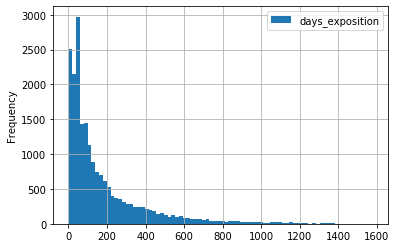

In [16]:
#Изучите время продажи квартиры. Постройте гистограмму. 
#Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.

data.plot(kind = 'hist', y = 'days_exposition', bins = 80, grid = True)
data[data['days_exposition'] != 0]['days_exposition'].describe()

Вывод: В среднем продажа квартиры занимает 180 дней.

In [17]:
data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 7 and days_exposition != 30 and days_exposition != 90 and days_exposition < 600')
data = data.query('rooms < 7') #больше 7 комнат считаются выбросами
data = data.query('total_area > 12 and total_area < 175') #на самом деле выбросами можно считать комнаты больше 120 кв.м., однако по графику следует сделать вывод, что квартиры больше 175 кв.м. действитель считаются редким явлением.
data = data.query('last_price < 12000000') #выбросом на диаграмме являлись данные в районе 12 млн рублей.
good_data = data.query('ceiling_height > 2.4 and ceiling_height < 3.5') #посмотрел в интернете, что минимальная высота потолков для комфортной жизни 2.4, а максимальная 3.5. опираясь на вышеуказанные данные по потолкам исключил данные выбросы

Text(0.5, 0, 'Цена')

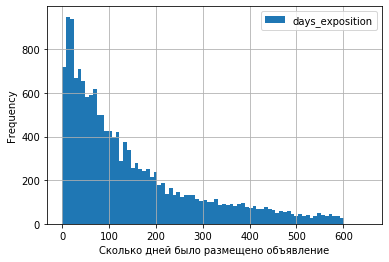

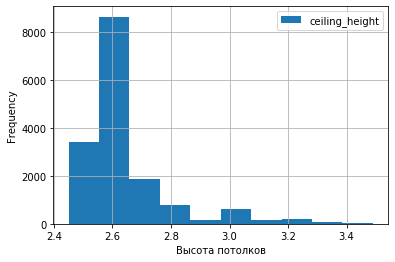

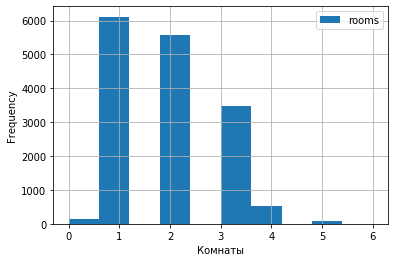

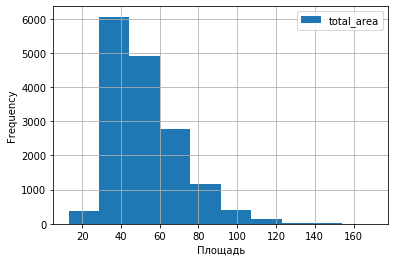

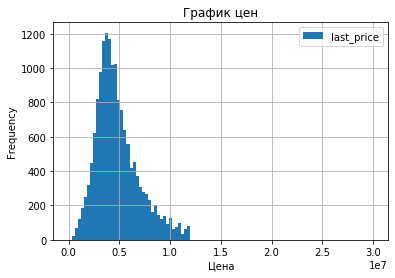

In [18]:
good_data.plot(kind='hist', y='days_exposition', grid=True, range=(0,650), bins=80)
plt.xlabel('Сколько дней было размещено объявление')
good_data.plot(kind='hist', y='ceiling_height', grid=True)
plt.xlabel('Высота потолков')
good_data.plot(kind='hist', y='rooms', grid=True)
plt.xlabel('Комнаты')
good_data.plot(kind='hist', y='total_area', grid=True)
plt.xlabel('Площадь')
good_data.plot(kind='hist', y='last_price', bins=100, grid=True, range = (0, 30000000), title='График цен')
plt.xlabel('Цена')

Вывод:
1. Заметил аномально высокие показатели на 7, 30, 45, 60 и 90 день. Скорее всего это связано с автоматическим снятием объявления с сервиса, что и подтвердилось в ходе исследования вопроса. 
2. Очистил данные. Видим низходящую диаграмму. Большинство продаж занимает около 200 - 300 дней. Продажи больше 600 дней считаются сверхдолгими, поэтому будем считать их выбросами.
3. Потолки ниже 2.4 метров и выше 3.5 метров убрал. Минимальная для комфортного проживания считаются потолки 2.4 метра, а высокими считаются 3 метра, однако возможно есть элитные квартиры с очень высокими потолками, поэтому их я оставил.
4. Удалил квартиры дороже 12 млн. 
5. Удалил выбросы в площади квартир. Данные больше 175 и меньше 12 считаются выбросами.

0.4656118832354659

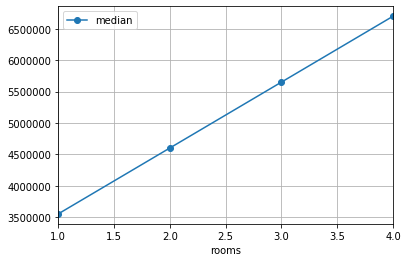

In [19]:
#Какие факторы больше всего влияют на стоимость квартиры? 
#Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Также изучите зависимость от даты размещения: дня недели, месяца и года.

room_price_dependence = good_data.query('rooms != 0').pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median', 'count'])
room_price_dependence.columns = ['mean', 'median', 'count']
room_price_dependence['mean'] = room_price_dependence['mean'].astype('int')
room_price_dependence['median'] = room_price_dependence['median'].astype('int')
room_price_dependence.query('count > 100').plot(y='median', style='-o', grid=True)
good_data['rooms'].corr(good_data['last_price'])

Вывод: Как видим из графика, цена за квартиру с каждой дополнительной комнатой становится всё выше.

0.7148677066649095

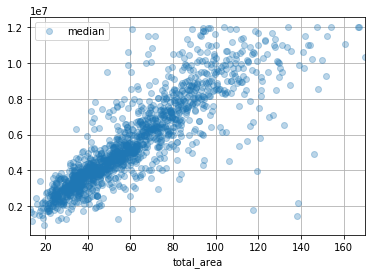

In [20]:
area_price_dependence = good_data.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'median', 'count'])
area_price_dependence.columns = ['mean', 'median', 'count']
area_price_dependence['mean'] = area_price_dependence['mean'].astype('int')
area_price_dependence['median'] = area_price_dependence['median'].astype('int')
area_price_dependence.plot(y='median', style='o', grid=True, alpha=0.3)
good_data['total_area'].corr(good_data['last_price'])

Вывод: Видим положительную корреляцию. Чем больше площадь, тем больше цена за квартиру.

-0.3370078345134622

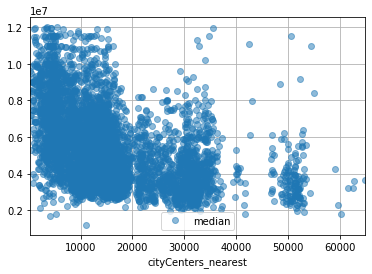

In [21]:
price_citycenter_dependence = good_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['mean', 'median', 'count'])
price_citycenter_dependence.columns = ['mean', 'median', 'count']
price_citycenter_dependence.plot(y='median', grid=True, style='o', alpha=0.5)
good_data['cityCenters_nearest'].corr(good_data['last_price'])

Вывод: Видим незначительную отрицательную корреляцию. Цена на квартиры показывают заметное увеличение в районе 10 км от центра города. 

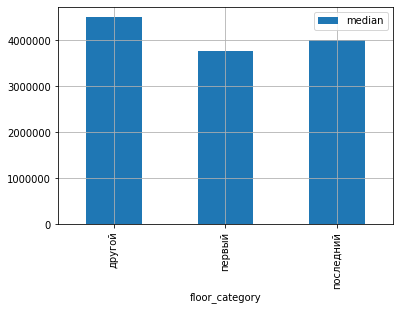

In [22]:
floor_price_dependence = good_data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median', 'count'])
floor_price_dependence.columns = ['mean', 'median', 'count']
floor_price_dependence.plot(y='median', grid=True,  kind='bar')

Вывод: Самые дешевые квартиры на первом этаже. Наиболее дорогие квартиры находятся между первым и последним этажем.

-0.010062513292927311

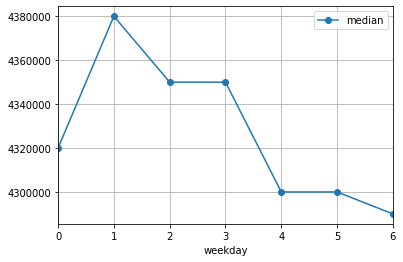

In [23]:
weekday_data = good_data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'median', 'count'])
weekday_data.columns = ['mean', 'median', 'count']
weekday_data.plot(y='median', grid=True, style='-o')
good_data['weekday'].corr(good_data['last_price'])

Вывод: Самая низкая цена на квартиру в воскресенье. Пик приходится на вторник.

-0.001280180375027885

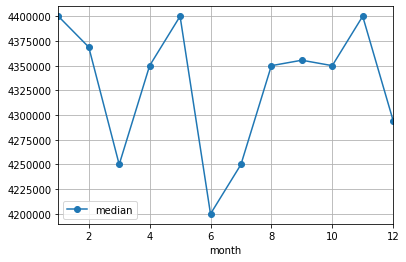

In [24]:
month_data = good_data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median', 'count'])
month_data.columns = ['mean', 'median', 'count']
month_data.plot(y='median', grid=True, style='-o')
good_data['month'].corr(good_data['last_price'])

Вывод: Самая низкая цена на квартиру в июне. Пик цен приходится на апрель и ноябрь.

-0.0006796983992361829

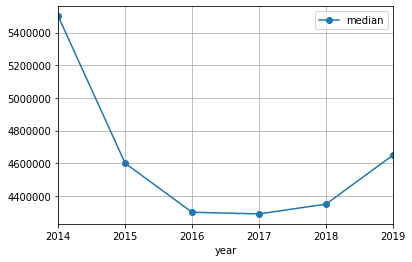

In [25]:
year_data = good_data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median', 'count'])
year_data.columns = ['mean', 'median', 'count']
year_data.plot(y='median', grid=True, style='-o')
good_data['year'].corr(good_data['last_price'])

Вывод: Видим резкое снижение цены на квадратные метры в 2015 году. Провел мини-исследование и убедился, что в 2015 в России произошел экономический кризис. По этой причине произошла стагнация цен на квадратные метры. 

In [26]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
#Эти данные можно найти по имени в столбце locality_name.

locality_ad = good_data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean', 'count'])
locality_ad.columns = ['mean', 'count']
locality_ad.sort_values(by='count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,104056.099505,10311
посёлок Мурино,85786.781250,448
посёлок Шушары,78139.924419,344
Всеволожск,66579.562278,281
Колпино,74693.808429,261
посёлок Парголово,89750.179283,251
деревня Кудрово,92398.112033,241
Пушкин,99567.092437,238
Гатчина,67404.185520,221


Вывод: Наиболее высокая средняя цена за квадратный метр в Санкт-Петербурге. Самая низкая средняя цена в Выборге. 

,last_price
cityCenters_nearest_km,
0,8.010310e+06
1,7.869111e+06
2,7.507615e+06
3,7.165535e+06
4,7.499103e+06
5,7.258952e+06
6,6.666603e+06
7,6.679095e+06
8,6.144586e+06


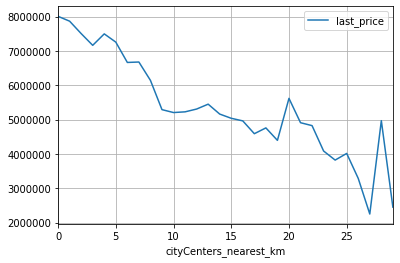

In [27]:
#Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
#Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. 
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
#После этого посчитайте среднюю цену для каждого километра. 
#Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
#Определите границу, где график сильно меняется, — это и будет центральная зона.

good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest']/1000
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].fillna(999)
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].astype('int')
pivot_table_km = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999').pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km.plot(grid=True)
pivot_table_km.head(10)

Вывод: Можно предположить, что центр города заканчивается на третьем километре. Однако Санкт-Петербург большой город, поэтому за центральную зону будем считать 6 километр от центра города. 

In [28]:
#Выделите сегмент квартир в центре. 
#Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
#Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

spb_center = good_data.query('cityCenters_nearest_km <= 6 and locality_name == "Санкт-Петербург"')

count    1425.000000
mean       66.163439
std        24.183231
min        13.000000
25%        47.000000
50%        63.900000
75%        80.500000
max       167.000000
Name: total_area, dtype: float64

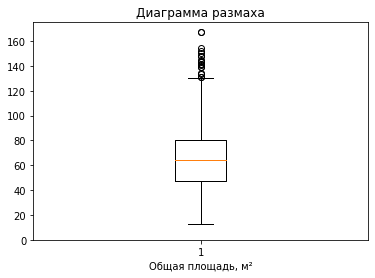

In [29]:
plt.boxplot(spb_center['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, м²')
plt.ylim(0, 175)
spb_center['total_area'].describe()

count      1425.000000
mean     115921.608421
std       30444.742824
min       15345.000000
25%       93647.000000
50%      110638.000000
75%      134210.000000
max      292307.000000
Name: price_per_square_meter, dtype: float64

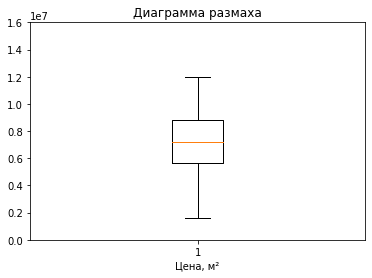

In [30]:
plt.boxplot(spb_center['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цена, м²')
plt.ylim(0, 16000000)
spb_center['price_per_square_meter'].describe()

count    1425.000000
mean        2.337544
std         1.034055
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

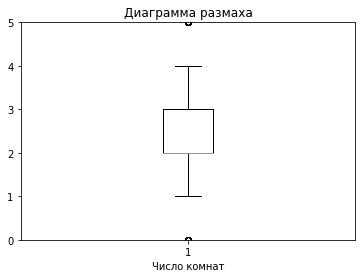

In [31]:
plt.boxplot(spb_center['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат')
plt.ylim(0, 5)
spb_center['rooms'].describe()

count    1425.000000
mean        2.827972
std         0.240445
min         2.460000
25%         2.650000
50%         2.700000
75%         3.000000
max         3.490000
Name: ceiling_height, dtype: float64

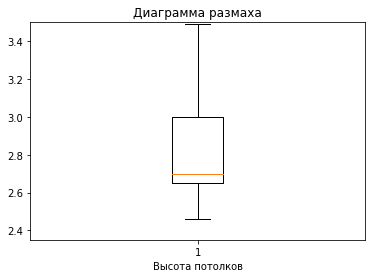

In [32]:
plt.boxplot(spb_center['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков')
plt.ylim(2.35, 3.5)
spb_center['ceiling_height'].describe()

Вывод (сравниваем область с Питером):
1. Медианная площадь увеличилась с 55 до 77 м.кв
2. Медианная цена увеличилась с 8.8 млн до 12 млн рублей
3. Медианное количество комнат увеличилось с 2 до 3
4. Медианная высота потолков увеличилась с 2.65 до 2.8 метров



0.4670112134552909

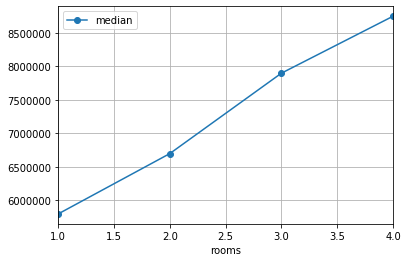

In [33]:
#Также выделите факторы, которые влияют на стоимость квартиры 
#(число комнат, этаж, удалённость от центра, дата размещения объявления).

spb_center_rooms = spb_center.query('rooms != 0').pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median', 'count'])
spb_center_rooms.columns = ['mean', 'median', 'count']
spb_center_rooms['mean'] = spb_center_rooms['mean'].astype('int')
spb_center_rooms['median'] = spb_center_rooms['median'].astype('int')
spb_center_rooms.query('count > 100').plot(y='median', style='-o', grid=True)
spb_center['rooms'].corr(spb_center['last_price'])

Вывод: Цена за квартиры значительно отличаются (В Питере цена за квартиру гораздо дороже)

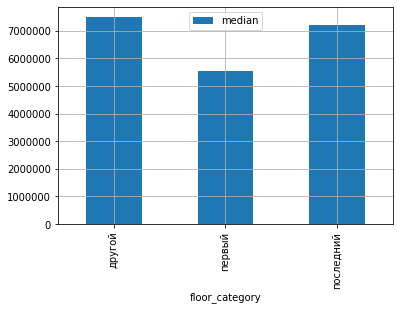

In [34]:
spb_center_floor = spb_center.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median', 'count'])
spb_center_floor.columns = ['mean', 'median', 'count']
spb_center_floor.plot(y='median', grid=True,  kind='bar')

Вывод: Цена в Питере по этажам гораздо выше. Так например цена на последние и другие этаже в два раза выше! Да уж, я лучше в деревне буду жить :))

-0.12160383270131107

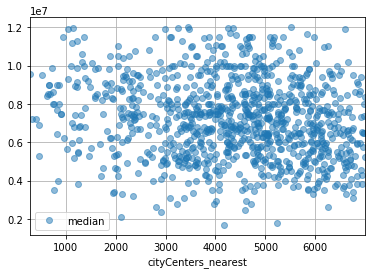

In [35]:
spb_center_nearest = spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['mean', 'median', 'count'])
spb_center_nearest.columns = ['mean', 'median', 'count']
spb_center_nearest.plot(y='median', grid=True, style='o', alpha=0.5)
spb_center['cityCenters_nearest'].corr(spb_center['last_price'])

Вывод: Очевидно, что цена в радиусе 6 км от центра Питера гораздо выше, чем в общей выборке. Однако цена не уменьшается с отдалением от центральной точки города. 

0.03737423707981105

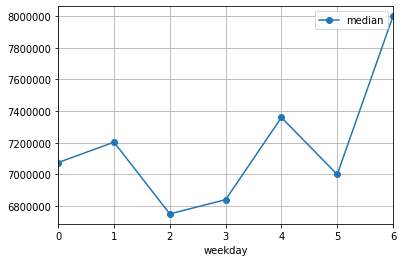

In [36]:
spb_center_weekday = spb_center.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'median', 'count'])
spb_center_weekday.columns = ['mean', 'median', 'count']
spb_center_weekday.plot(y='median', grid=True, style='-o')
spb_center['weekday'].corr(spb_center['last_price'])

Вывод: Видим также рост в абсолютных цифрах. Самые дорогие квартиры публикуют в воскресенье.

-0.007170447221615126

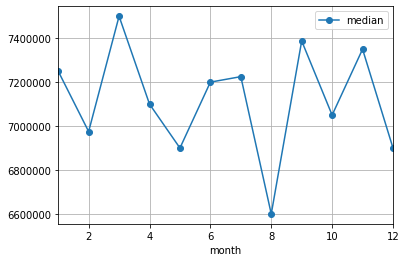

In [37]:
spb_center_month = spb_center.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median', 'count'])
spb_center_month.columns = ['mean', 'median', 'count']
spb_center_month.plot(y='median', grid=True, style='-o')
spb_center['month'].corr(spb_center['last_price'])

Вывод: Видно, что самая высокая цена в Питере в марте. Самая низкая в августе.

-0.0065602837309114495

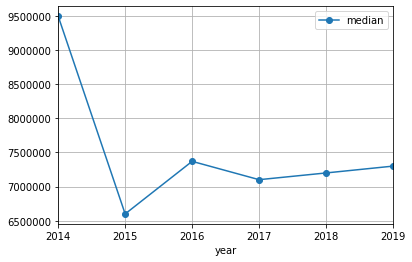

In [38]:
spb_center_year = spb_center.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median', 'count'])
spb_center_year.columns = ['mean', 'median', 'count']
spb_center_year.plot(y='median', grid=True, style='-o')
spb_center['year'].corr(spb_center['last_price'])

Вывод: Ситуация по годам схожа с общей выборкой, с одним лишь незначительным отличием: в общей выборке есть тенденция на рост цен на квартиры в 2019 году.

## Общий вывод

1. Цена общей выборки значительно отличаются от центра Санкт-Петербурга
2. Видим значительную положительную корреляцию цены от площади (в общей выборке)
3. Видим, что в 2015 году экономический кризис значительно повлиял на рынок недвижимости, из-за чего рынок очень долго восстанавливался
4. В общей выборке популярным сезоном продажи недвижимости является апрель, в то время как в Питере - январь
5. Ожидаемый лидер по цене за кв.м. и по объему объявлений - Питер. Выборг завершает десятку населенных пунктов по популярности.